In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from datetime import datetime

In [5]:

# path0 = 'Q:\\SHA_KQ\\Digital Intelligence\\深度赋智-AI\\FTP\\hp_train\\2019 outbound\\'
# path1 = 'Q:\\SHA_KQ\\Digital Intelligence\\深度赋智-AI\\FTP\\hp_train\\2020 outbound\\'
# # path2 = 'Q:\\SHA_KQ\\Digital Intelligence\\深度赋智-AI\\FTP\\hp_train\\2021 outbound\\'
# path2 = 'Q:\\SHA_KQ\\Digital Intelligence\\深度赋智-AI\\FTP\\保乐力加_train\\outbound\\'
# %%time
# dfs0 = pd.DataFrame()
# for fname in os.listdir(path0):
#     if re.search(r'\.xls$', fname):
#         dfs0 = pd.concat(
#             [dfs0 ,pd.read_excel(path0 + fname)], 
#             axis = 0, 
#             ignore_index = True)

# dfs1 = pd.DataFrame()
# for fname in os.listdir(path1):
#     if re.search(r'\.xls$', fname):
#         dfs1 = pd.concat(
#             [dfs1 ,pd.read_excel(path1 + fname)], 
#             axis = 0, 
#             ignore_index = True)


# dfs2 = pd.DataFrame()
# for fname in os.listdir(path2):
#     if re.search(r'\.xls$', fname):
#         dfs2 = pd.concat(
#             [dfs2 ,pd.read_excel(path2 + fname)], 
#             axis = 0, 
#             ignore_index = True)
# dfs2 = dfs2.dropna(axis =1 , how = 'all')
 
# # path+
# dfs = pd.DataFrame()
# for fname in os.listdir(path):
#     if re.search(r'\.xls$', fname):
#         dfs = pd.concat(
#             [dfs ,pd.read_excel(path + fname)], axis = 0, ignore_index = True)
# prc_in = pd.DataFrame(dfs)
# prc_in = prc_in.drop(['仓库城市','仓库编号','Unnamed: 7'], axis = 1)
# prc_in.columns = ['time', 'sku','name','code','quant']

# dfs3 = pd.DataFrame()
# for fname in os.listdir(path2):
#     if re.search(r'\.xlsx$', fname):
#         dfs3 = pd.concat(
#             [dfs3 ,pd.read_excel(path3 + fname)], 
#             axis = 0, 
#             ignore_index = True)
# pd.set_option("display.max_rows", None, "display.max_columns", None)
  
# # dfs2.head(200)

In [306]:
# df = pd.read_clipboard()
# df.to_csv('./fas_057_rh.csv', index = False, encoding='utf_8_sig')
df = pd.read_csv('./fas_057_rh.csv')
df = df.fillna(method = 'ffill')

In [307]:
def date_mutate(col):
    df[col + '_time'] = df[col].str.slice(11,-1).astype(str)
    df[col] = df[col].str.slice(0,10)
    df[col + '_2'] = [datetime.strptime(i,'%H:%M:%S.%f').strftime('%H%M%S') for i in df[col + '_time']]
    return df.head(1)

# df.columns[df.columns.str.contains(r'date|DATE')].to_numpy()
# df[df['receipt_id'].str.findall(r'(货)').apply(len) > 1]

for i in df.columns[df.columns.str.contains(r'date|DATE')].to_numpy():
    date_mutate(i)


first_df = df.groupby(
    'CREATION_DATE_TIME_STAMP'
    )['CREATION_DATE_TIME_STAMP_2'].min().reset_index();first_df


first_df = first_df.merge(
    df, 
    on = ['CREATION_DATE_TIME_STAMP', 'CREATION_DATE_TIME_STAMP_2'], 
    how = 'inner')

# first_df2 = df.copy().groupby('CLOSE_DATE')[
#     ['receipt_id', 'receipt_date','total_lines', 'TOTAL_QTY']
#     ].sum().reset_index()

# first_df2.columns = ['CLOSE_DATE', 'ttl_line_cnt', 'ttl_qty_sum']

# first_df = first_df.merge(first_df2, how = 'inner', on = 'CLOSE_DATE')

# df[['CREATION_DATE_TIME_STAMP', 'CREATION_DATE_TIME_STAMP_2']].sort_values(by = 'CREATION_DATE_TIME_STAMP')



In [308]:

train_first = first_df.groupby(
    'CREATION_DATE_TIME_STAMP'
    ).agg({'receipt_id':['nunique'], 
    'total_lines': ['sum'], 
    'TOTAL_CONTAINERS': 'sum', 
    'TOTAL_WEIGHT':'sum',
    'TOTAL_QTY': ['sum'],
    'CREATION_DATE_TIME_STAMP_2': 'min' }).reset_index()
    
train_full = df.groupby(
    'CREATION_DATE_TIME_STAMP'
    ).agg({'receipt_id':['nunique'], 
    'total_lines': ['sum'], 
    'TOTAL_CONTAINERS': 'sum', 
    'TOTAL_WEIGHT':'sum',
    'TOTAL_QTY': ['sum'],
    'CREATION_DATE_TIME_STAMP_2': 'max' }).reset_index()

train_full.columns = ['CREATION_DATE_TIME_STAMP','id', 'line_sum', 'container_sum', 'weight', 'qty', 'creat_time']
train_first.columns = ['CREATION_DATE_TIME_STAMP','id', 'line_sum', 'container_sum', 'weight', 'qty', 'creat_time']


In [309]:
train_first.index= pd.to_datetime(train_first['CREATION_DATE_TIME_STAMP'], \
    yearfirst = True,  format='%Y-%m-%d')
train_full.index = train_full['CREATION_DATE_TIME_STAMP']
train_full.index = pd.DatetimeIndex(train_full.index);train_full.index

train_full['CREATION_DATE_TIME_STAMP'] = pd.to_datetime(train_full['CREATION_DATE_TIME_STAMP'])
train_first['CREATION_DATE_TIME_STAMP'] = pd.to_datetime(train_first['CREATION_DATE_TIME_STAMP'])

In [310]:
# plt1 = (train_full.sort_values(
#     by = 'CREATION_DATE_TIME_STAMP')['qty'] - train_first.sort_values(
#         by = 'CREATION_DATE_TIME_STAMP')['qty'] ).reset_index()
# sns.lineplot(x = 'index', y  ='qty', data = plt1)

---

In [311]:
# train_first.index= pd.to_datetime(train_first['CREATION_DATE_TIME_STAMP'], yearfirst = True,  format='%Y-%m-%d')
# train_first.pop('CREATION_DATE_TIME_STAMP')
# train_full.pop('CREATION_DATE_TIME_STAMP')
# train_full['qty'] = train_full['qty'].astype(int)
# train_first['qty'] = train_first['qty'].astype(int)
# train_first['qty2'] = train_full['qty'].to_numpy() ; train_first

# train_first = train_first.reset_index()
# train_first.drop(['qty2','CREATION_DATE_TIME_STAMP','creat_time'], axis =1) 

# sktime; timeseries only prediction on trainfull


In [312]:
# train_full.index = train_full['CREATION_DATE_TIME_STAMP']
# train_full.index = pd.DatetimeIndex(train_full.index);train_full.index
train_full_sktime = train_full.asfreq('D')
train_full_sktime = train_full_sktime.fillna(0);train_full_sktime


,CREATION_DATE_TIME_STAMP,id,line_sum,container_sum,weight,qty,creat_time
CREATION_DATE_TIME_STAMP,,,,,,,
2017-09-11,2017-09-11 00:00:00,1.0,2.0,22.0,22000.00,880.0,032456
2017-09-12,2017-09-12 00:00:00,9.0,30.0,96.0,850242.84,512046.0,084029
2017-09-13,2017-09-13 00:00:00,6.0,9.0,41.0,41290.00,1778.0,014356
2017-09-14,2017-09-14 00:00:00,11.0,49.0,140.0,121620.00,16690.0,071055
2017-09-15,2017-09-15 00:00:00,4.0,16.0,36.0,96619.20,93797.0,034049
...,...,...,...,...,...,...,...
2021-05-03,0,0.0,0.0,0.0,0.00,0.0,0
2021-05-04,0,0.0,0.0,0.0,0.00,0.0,0
2021-05-05,0,0.0,0.0,0.0,0.00,0.0,0


In [ ]:
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.naive import NaiveForecaster
from sktime.regression import ComposableTimeSeriesForestRegressor
from sktime.forecasting.model_selection import temporal_train_test_split
from sklearn.metrics import mean_absolute_percentage_error

x = train_full_sktime.drop(['qty', 'CREATION_DATE_TIME_STAMP', 'creat_time'], axis = 1)
y = train_full_sktime.loc[:,'qty']
x_train, x_test , y_train, y_test = temporal_train_test_split(x, y)
#
#  # fh = ForecastingHorizon(x_test, is_relative=False)
# forecaster = ComposableTimeSeriesForestRegressor(x = x_train, y = y_train)
# forecaster.fit(x_train ,y = y_train)
# y_pred = forecaster.predict(x_test)
# mean_absolute_percentage_error(y_test, y_pred)

forecaster = NaiveForecaster(sp = 21)
forecaster.fit(y_train)

fh = ForecastingHorizon(y_test.index, is_relative=False)
y_pred = forecaster.predict(fh )
mean_absolute_percentage_error(y_test, y_pred)



In [ ]:
from sktime.regression.interval_based import  TimeSeriesForestRegressor

In [ ]:
x_train.shape[1]

In [ ]:
# forecaster = TimeSeriesForestRegressor( )
# # fh = ForecastingHorizon(x_test, is_relative=False)
# forecaster.fit(X = x_train,  y = y_train)
# y_pred = forecaster.predict(x_test)
# mean_absolute_percentage_error(y_test, y_pred)

---

# prophet prepare

In [313]:
# train_full = train_full_sktime
train_full = train_full.asfreq('D')
train_full = train_full.fillna(0) 
train_first = train_first.asfreq('D')
train_first = train_first.fillna(0)
train_full['CREATION_DATE_TIME_STAMP'] = train_full.index
train_first['CREATION_DATE_TIME_STAMP'] = train_first.index;train_full

,CREATION_DATE_TIME_STAMP,id,line_sum,container_sum,weight,qty,creat_time
CREATION_DATE_TIME_STAMP,,,,,,,
2017-09-11,2017-09-11,1.0,2.0,22.0,22000.00,880.0,032456
2017-09-12,2017-09-12,9.0,30.0,96.0,850242.84,512046.0,084029
2017-09-13,2017-09-13,6.0,9.0,41.0,41290.00,1778.0,014356
2017-09-14,2017-09-14,11.0,49.0,140.0,121620.00,16690.0,071055
2017-09-15,2017-09-15,4.0,16.0,36.0,96619.20,93797.0,034049
...,...,...,...,...,...,...,...
2021-05-03,2021-05-03,0.0,0.0,0.0,0.00,0.0,0
2021-05-04,2021-05-04,0.0,0.0,0.0,0.00,0.0,0
2021-05-05,2021-05-05,0.0,0.0,0.0,0.00,0.0,0


In [314]:
# train_full
train_full = train_full.reset_index(drop =True)
train_first = train_first.reset_index(drop =True)

train_fin = train_full.merge(train_first, 
    on = 'CREATION_DATE_TIME_STAMP', 
    how = 'outer',
    suffixes = ['_full', '_first'])
train_fin = train_fin.fillna(0);train_fin

,CREATION_DATE_TIME_STAMP,id_full,line_sum_full,container_sum_full,weight_full,qty_full,creat_time_full,id_first,line_sum_first,container_sum_first,weight_first,qty_first,creat_time_first
0,2017-09-11,1.0,2.0,22.0,22000.00,880.0,032456,1.0,2.0,22.0,22000.0,880.0,032456
1,2017-09-12,9.0,30.0,96.0,850242.84,512046.0,084029,1.0,1.0,19.0,18600.0,744.0,050737
2,2017-09-13,6.0,9.0,41.0,41290.00,1778.0,014356,1.0,1.0,1.0,100.0,4.0,012211
3,2017-09-14,11.0,49.0,140.0,121620.00,16690.0,071055,1.0,1.0,9.0,8000.0,6000.0,002402
4,2017-09-15,4.0,16.0,36.0,96619.20,93797.0,034049,1.0,2.0,13.0,12525.0,501.0,014709
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,2021-05-03,0.0,0.0,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,0.0,0
1331,2021-05-04,0.0,0.0,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,0.0,0
1332,2021-05-05,0.0,0.0,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,0.0,0
1333,2021-05-06,0.0,0.0,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,0.0,0


In [315]:
# train_full['creat_time_first']
train_fin['span_first'] = train_fin[
    'creat_time_first'
    ].str.slice(1,2).fillna(
        0
        ).astype(int, errors = 'ignore') + train_fin['creat_time_first'].str.slice(2,4).fillna(
            0
            ).astype(int, errors = 'ignore')/60*1 + 8

# # train_full['creat_time_x']
# train_first['span_full'] = train_first['creat_time_full'].str.slice(1,2).astype(int) + 
#     train_first['creat_time_full'].str.slice(2,4).astype(int)/60*1 + 8

In [316]:
train_first['span_first'] = train_first[
    'creat_time'
    ].str.slice(1,2).fillna(
        0
        ).astype(int, errors = 'ignore') + train_first['creat_time'].str.slice(2,4).fillna(
            0
            ).astype(int, errors = 'ignore')/60*1 + 8
train_first = train_first.drop('creat_time', axis = 1)

In [319]:
train_fin

,CREATION_DATE_TIME_STAMP,id_full,line_sum_full,container_sum_full,weight_full,qty_full,creat_time_full,id_first,line_sum_first,container_sum_first,weight_first,qty_first,creat_time_first,span_first
0,2017-09-11,1.0,2.0,22.0,22000.00,880.0,032456,1.0,2.0,22.0,22000.0,880.0,032456,11.400000
1,2017-09-12,9.0,30.0,96.0,850242.84,512046.0,084029,1.0,1.0,19.0,18600.0,744.0,050737,13.116667
2,2017-09-13,6.0,9.0,41.0,41290.00,1778.0,014356,1.0,1.0,1.0,100.0,4.0,012211,9.366667
3,2017-09-14,11.0,49.0,140.0,121620.00,16690.0,071055,1.0,1.0,9.0,8000.0,6000.0,002402,8.400000
4,2017-09-15,4.0,16.0,36.0,96619.20,93797.0,034049,1.0,2.0,13.0,12525.0,501.0,014709,9.783333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,2021-05-03,0.0,0.0,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,0.0,0,8.000000
1331,2021-05-04,0.0,0.0,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,0.0,0,8.000000
1332,2021-05-05,0.0,0.0,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,0.0,0,8.000000
1333,2021-05-06,0.0,0.0,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,0.0,0,8.000000


In [320]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sklearn.metrics import mean_absolute_percentage_error
x = train_first 
x['y'] = train_fin['qty_full']
# x['CREATION_DATE_TIME_STAMP'] = x.index
x_train, x_test = temporal_train_test_split(x)

cols = [i for i in x.columns if i not in ['y', 'CREATION_DATE_TIME_STAMP']]
x_train


,CREATION_DATE_TIME_STAMP,id,line_sum,container_sum,weight,qty,span_first,y
0,2017-09-11,1.0,2.0,22.0,22000.0,880.0,11.400000,880.0
1,2017-09-12,1.0,1.0,19.0,18600.0,744.0,13.116667,512046.0
2,2017-09-13,1.0,1.0,1.0,100.0,4.0,9.366667,1778.0
3,2017-09-14,1.0,1.0,9.0,8000.0,6000.0,8.400000,16690.0
4,2017-09-15,1.0,2.0,13.0,12525.0,501.0,9.783333,93797.0
...,...,...,...,...,...,...,...,...
996,2020-06-03,1.0,2.0,4.0,500.0,8.0,8.850000,552.0
997,2020-06-04,1.0,1.0,23.0,16236.0,10824.0,9.983333,11051.0
998,2020-06-05,0.0,0.0,0.0,0.0,0.0,8.000000,0.0
999,2020-06-06,0.0,0.0,0.0,0.0,0.0,8.000000,0.0


In [322]:
%%time

from fbprophet import Prophet
# df = x[['CREATION_DATE_TIME_STAMP', 'qty']]
df_naiv = x_train 
df_naiv = df_naiv.rename({'CREATION_DATE_TIME_STAMP' : 'ds'}, axis = 1)
m = Prophet()
[m.add_regressor(i) for i in cols]

m.fit(df_naiv)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Wall time: 695 ms


In [323]:
from sklearn.metrics import mean_absolute_percentage_error
df_naiv_test = x_test
df_naiv_test = df_naiv_test.rename({'CREATION_DATE_TIME_STAMP' : 'ds'}, axis = 1)
# m.predict(x_test)
mean_absolute_percentage_error(df_naiv_test['y'], m.predict(df_naiv_test)['yhat'])
# fig = m.plot_components(m.predict(x_test))

3.878807837446074e+19

In [ ]:
# m.plot_components(m.predict(df2))
# plt.show()

In [ ]:
# m.plot(m.predict(df2))
# plt.show()

---

# pseudo labeling

In [324]:
train_first['dif'] = train_first['qty'] - train_full['qty'] != 0
train_first['dif'] = [1 if i == True else 0 for i in train_first['dif']]

train_full['dif'] = train_first['qty'] - train_full['qty'] != 0
train_full['dif'] = [1 if i == True else 0 for i in train_full['dif']]

In [467]:
train_first


,CREATION_DATE_TIME_STAMP,id,line_sum,container_sum,weight,qty,span_first,y,dif
0,2017-09-11,1.000,2.000,22.000,22000.000,880.000,11.400,880.000,0
1,2017-09-12,1.000,1.000,19.000,18600.000,744.000,13.117,512046.000,1
2,2017-09-13,1.000,1.000,1.000,100.000,4.000,9.367,1778.000,1
3,2017-09-14,1.000,1.000,9.000,8000.000,6000.000,8.400,16690.000,1
4,2017-09-15,1.000,2.000,13.000,12525.000,501.000,9.783,93797.000,1
...,...,...,...,...,...,...,...,...,...
1330,2021-05-03,0.000,0.000,0.000,0.000,0.000,8.000,0.000,0
1331,2021-05-04,0.000,0.000,0.000,0.000,0.000,8.000,0.000,0
1332,2021-05-05,0.000,0.000,0.000,0.000,0.000,8.000,0.000,0
1333,2021-05-06,0.000,0.000,0.000,0.000,0.000,8.000,0.000,0


In [ ]:
# train_full['diff'] = train_full['qty_x'] - train_full['qty_y'] ==  0
# train_full['diff'] = [1 if i == True else 0 for i in train_full['diff']]

In [ ]:
# train_full = train_full.asfreq('D')

In [328]:
x = train_first.drop('y', axis  =1 )
x_train, x_test = temporal_train_test_split(x)
x_train

,CREATION_DATE_TIME_STAMP,id,line_sum,container_sum,weight,qty,span_first,dif
0,2017-09-11,1.0,2.0,22.0,22000.0,880.0,11.400000,0
1,2017-09-12,1.0,1.0,19.0,18600.0,744.0,13.116667,1
2,2017-09-13,1.0,1.0,1.0,100.0,4.0,9.366667,1
3,2017-09-14,1.0,1.0,9.0,8000.0,6000.0,8.400000,1
4,2017-09-15,1.0,2.0,13.0,12525.0,501.0,9.783333,1
...,...,...,...,...,...,...,...,...
996,2020-06-03,1.0,2.0,4.0,500.0,8.0,8.850000,1
997,2020-06-04,1.0,1.0,23.0,16236.0,10824.0,9.983333,1
998,2020-06-05,0.0,0.0,0.0,0.0,0.0,8.000000,0
999,2020-06-06,0.0,0.0,0.0,0.0,0.0,8.000000,0


In [329]:
from fbprophet import Prophet 
df_lb = x_train 

## qty_x s是最终预测值, 所以要drop
cols_lb = [i for i in df_lb.columns 
    if i not in ['dif', 'CREATION_DATE_TIME_STAMP']]

# df_lb = df_lb.drop(['creat_time_x','creat_time_y', 'qty_x'], axis =1 )
df_lb = df_lb.rename({'CREATION_DATE_TIME_STAMP' : 'ds', 'dif': 'y'}, axis = 1)
m = Prophet()
[m.add_regressor(i) for i in cols_lb]

m.fit(df_lb)


# ?mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import  mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import mean_absolute_error
from sklearn.metrics import accuracy_score

# x_test1 = x_test.drop(['dif'], axis =1 )
x_test1 = x_test.rename({'CREATION_DATE_TIME_STAMP' : 'ds', 'dif': 'y'}, axis = 1)
 
# m.predict(x_test)
forecast = m.predict(x_test1)
mean_absolute_error(x_test1['y'], m.predict(x_test1)['yhat'])
# fig = m.plot_components(m.predict(x_test))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [59]:
# %%warning = False
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)
 

In [340]:
lb_prophet_result = pd.DataFrame(forecast['yhat'])
lb_prophet_result['abs_diff'] = np.abs(forecast['yhat'] - .5)

In [343]:
lb_prophet_result.sort_values('abs_diff')

,yhat,abs_diff
321,0.746158,0.246158
124,0.812815,0.312815
270,0.824536,0.324536
308,0.826135,0.326135
94,0.836777,0.336777
...,...,...
64,1.059350,0.559350
71,1.059717,0.559717
314,-0.062129,0.562129
149,1.066028,0.566028


In [350]:
acc_score_data = [1 if i>0.042666 else 0 for i in forecast['yhat']]
acc_score_data1 = [1 if i>0.746100 else 0 for i in forecast['yhat']]
acc_score_data2 = [1 if i>0.89100 else 0 for i in forecast['yhat']]

In [351]:
# mean_absolute_error(x_test1['y'], m.predict(x_test1)['yhat'])
[accuracy_score(x_test1['y'],i) for i in [acc_score_data, acc_score_data1, acc_score_data2]]


[0.7904191616766467, 0.9161676646706587, 0.8622754491017964]

----
## try h2o predict qty

In [513]:
x_train2 = x_train[x_train['dif'] == 1] 
x_test2 = x_test[x_test['dif'] == 1];len(x_test2)
x_train2['qty_tar'] = train_full[train_full['dif'] == 1].iloc[0:len(x_train2), :]['qty']
x_test2['qty_tar'] = train_full[train_full['dif'] == 1].iloc[len(x_train2):, :]['qty'];x_train2

<ipython-input-513-dd408b05bf4d>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-513-dd408b05bf4d>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CREATION_DATE_TIME_STAMP,id,line_sum,container_sum,weight,qty,span_first,dif,qty_tar
1,2017-09-12,1.000,1.000,19.000,18600.000,744.000,13.117,1,512046.000
2,2017-09-13,1.000,1.000,1.000,100.000,4.000,9.367,1,1778.000
3,2017-09-14,1.000,1.000,9.000,8000.000,6000.000,8.400,1,16690.000
4,2017-09-15,1.000,2.000,13.000,12525.000,501.000,9.783,1,93797.000
7,2017-09-18,1.000,1.000,1.000,0.000,600.000,8.967,1,122508.000
...,...,...,...,...,...,...,...,...,...
990,2020-05-28,1.000,5.000,10.000,1450.000,148.000,14.850,1,276520.000
991,2020-05-29,1.000,6.000,15.000,15487.200,8310.000,12.617,1,75476.000
994,2020-06-01,1.000,1.000,2.000,9651.440,6470.000,10.850,1,78856.000
996,2020-06-03,1.000,2.000,4.000,500.000,8.000,8.850,1,552.000


In [558]:
import h2o
from h2o.estimators import H2OIsolationForestEstimator
from h2o.estimators import H2ODeepLearningEstimator
from h2o.estimators import H2OXGBoostEstimator
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,54 mins 06 secs
H2O_cluster_timezone:,Asia/Shanghai
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,3 months
H2O_cluster_name:,H2O_from_python_dscshap3808_se0ewh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.206 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [559]:
H2OXGBoostEstimator.available()

Cannot build an XGBoost model - no backend found.


False

In [531]:
cols_h2o = [i for i in x_train2.columns.to_numpy() if i not in 'qty_tar']

In [590]:


# Import the prostate dataset
h2o_df = h2o.H2OFrame(x_train2)
# Split the data giving the training dataset 75% of the data
train,test = h2o_df.split_frame(ratios=[0.75])

# Build an Isolation forest model
model = H2OIsolationForestEstimator(sample_rate = 0.1,
                                    max_depth = 20,
                                    ntrees = 500)
model.train(training_frame=train,x =cols_h2o)

# Calculate score
score = model.predict(test)
result_pred = score["predict"]

# Predict the leaf node assignment
ln_pred = model.predict_leaf_node_assignment(test, "Path")

Parse progress: |█████████████████████████████████████████████████████████| 100%


C:\Users\dscshap3808\Miniconda3\envs\siming\lib\site-packages\h2o\estimators\estimator_base.py:200: RuntimeWarning:

Dropping bad and constant columns: [dif, id]



isolationforest Model Build progress: |███████████████████████████████████| 100%
isolationforest prediction progress: |████████████████████████████████████| 100%


In [591]:
score2 = model.predict(train)

isolationforest prediction progress: |████████████████████████████████████| 100%


In [607]:
forest_pred_trai = pd.concat([score2['predict'].as_data_frame(),\
    result_pred.as_data_frame() ], axis = 0).reset_index()

In [608]:
forest_pred_test = model.predict(h2o.H2OFrame(x_test2))

Parse progress: |█████████████████████████████████████████████████████████| 100%
isolationforest prediction progress: |████████████████████████████████████| 100%


In [616]:
x_train2

,CREATION_DATE_TIME_STAMP,id,line_sum,container_sum,weight,qty,span_first,dif,qty_tar,labels
1,2017-09-12,1.000,1.000,19.000,18600.000,744.000,13.117,1,512046.000,0.441
2,2017-09-13,1.000,1.000,1.000,100.000,4.000,9.367,1,1778.000,0.225
3,2017-09-14,1.000,1.000,9.000,8000.000,6000.000,8.400,1,16690.000,0.199
4,2017-09-15,1.000,2.000,13.000,12525.000,501.000,9.783,1,93797.000,0.276
7,2017-09-18,1.000,1.000,1.000,0.000,600.000,8.967,1,122508.000,0.180
...,...,...,...,...,...,...,...,...,...,...
990,2020-05-28,1.000,5.000,10.000,1450.000,148.000,14.850,1,276520.000,NaN
991,2020-05-29,1.000,6.000,15.000,15487.200,8310.000,12.617,1,75476.000,NaN
994,2020-06-01,1.000,1.000,2.000,9651.440,6470.000,10.850,1,78856.000,NaN
996,2020-06-03,1.000,2.000,4.000,500.000,8.000,8.850,1,552.000,NaN


In [615]:
x_train2['labels'] = forest_pred_trai['predict'] 
x_test2['labels'] = forest_pred_test.as_data_frame()['predict']

<ipython-input-615-855af0fde591>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-615-855af0fde591>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [576]:
predictors = [i for i in x_train2.columns.to_numpy() if i not in 'qty_tar']
response = 'qty_tar'
# Import the prostate dataset
h2o_df = h2o.H2OFrame(x_train2)
# Split the data giving the training dataset 75% of the data
train,test = h2o_df.split_frame(ratios=[0.75])

dl = H2ODeepLearningEstimator(distribution="tweedie",
                               hidden=[30,30],
                               epochs=1000,
                               train_samples_per_iteration=-1,
                               reproducible=True,
                               activation="Maxout",
                               single_node_mode=False,
                               balance_classes=False,
                               force_load_balance=False,
                               seed=707,
                               tweedie_power=1.5,
                               score_training_samples=0,
                               score_validation_samples=0,
                               score_each_iteration = True,
                               stopping_rounds=0)
dl.train(x=predictors,
         y=response,
          training_frame= train,
          validation_frame = test)

# Eval performance:
perf = dl.model_performance()


Parse progress: |█████████████████████████████████████████████████████████| 100%


C:\Users\dscshap3808\Miniconda3\envs\siming\lib\site-packages\h2o\estimators\estimator_base.py:200: RuntimeWarning:

Dropping bad and constant columns: [dif, id]



deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [577]:
perf


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 12233872791.934929
RMSE: 110606.83881177931
MAE: 83582.19584068553
RMSLE: 2.100745840887982
Mean Residual Deviance: 360.2156392239604


In [579]:

# Generate predictions on a test set (if necessary):
pred = dl.predict(test)

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [585]:
sult = pd.concat([test.as_data_frame()['qty_tar'],pred.as_data_frame()], axis = 1)

In [586]:
sult

,qty_tar,predict
0,512046,70588.954
1,557054,118090.120
2,269974,75245.898
3,227126,49231.764
4,1556,110033.479
...,...,...
148,137628,101245.807
149,66792,94210.784
150,627,108667.831
151,174614,93680.845


In [587]:
mean_absolute_percentage_error(sult['qty_tar'], sult['predict'])

0.9815690588439775

In [ ]:
# shabi shuju


----
## Darts

In [223]:
df_lb

,ds,id,line_sum,container_sum,weight,qty,span_first,y
0,2017-09-11,1.0,2.0,22.0,22000.0,880.0,11.400000,0
1,2017-09-12,1.0,1.0,19.0,18600.0,744.0,13.116667,1
2,2017-09-13,1.0,1.0,1.0,100.0,4.0,9.366667,1
3,2017-09-14,1.0,1.0,9.0,8000.0,6000.0,8.400000,1
4,2017-09-15,1.0,2.0,13.0,12525.0,501.0,9.783333,1
...,...,...,...,...,...,...,...,...
996,2020-06-03,1.0,2.0,4.0,500.0,8.0,8.850000,1
997,2020-06-04,1.0,1.0,23.0,16236.0,10824.0,9.983333,1
998,2020-06-05,0.0,0.0,0.0,0.0,0.0,8.000000,0
999,2020-06-06,0.0,0.0,0.0,0.0,0.0,8.000000,0


In [224]:
from darts import TimeSeries
# df_lb.drop()
series = TimeSeries.from_dataframe(df_lb, 'ds', 'y' )
series_test = TimeSeries.from_dataframe(x_test1, 'ds', 'y')

In [225]:
from darts.models import *
md1 = NBEATSModel(input_chunk_length=12, output_chunk_length=6, n_epochs=5, random_state=10)
md1.fit(series, verbose=True)

[2021-08-19 16:27:38,020] INFO | darts.models.torch_forecasting_model | Train dataset contains 984 samples.
[2021-08-19 16:27:38,020] INFO | darts.models.torch_forecasting_model | Train dataset contains 984 samples.
INFO:darts.models.torch_forecasting_model:Train dataset contains 984 samples.
[2021-08-19 16:27:38,149] INFO | darts.models.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-08-19 16:27:38,149] INFO | darts.models.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
INFO:darts.models.torch_forecasting_model:Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.


  0%|          | 0/5 [00:00<?, ?it/s]

In [227]:
md2 = BlockRNNModel(model = 'LSTM',input_chunk_length=12, output_chunk_length=6, n_epochs=5)
md2.fit(series, verbose=True)

[2021-08-19 16:29:24,251] INFO | darts.models.torch_forecasting_model | Train dataset contains 984 samples.
[2021-08-19 16:29:24,251] INFO | darts.models.torch_forecasting_model | Train dataset contains 984 samples.
INFO:darts.models.torch_forecasting_model:Train dataset contains 984 samples.
[2021-08-19 16:29:24,260] INFO | darts.models.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-08-19 16:29:24,260] INFO | darts.models.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
INFO:darts.models.torch_forecasting_model:Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.


  0%|          | 0/5 [00:00<?, ?it/s]

In [234]:
from darts.metrics import *
pred = md1.predict(n=334,series = series);pred.pd_dataframe()
pred2 = md2.predict(n = 334, series = series)

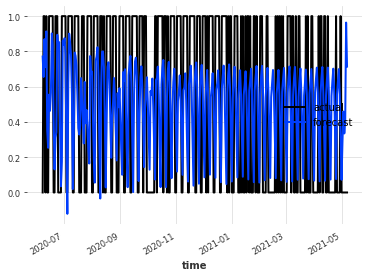

In [235]:

series_test.plot(label='actual')
pred.plot(label='forecast')
plt.legend(); 

In [275]:
pred_1_values = pred.pd_dataframe().reset_index()['y']
pred_2_values = pred2.pd_dataframe().reset_index()['y']

In [269]:
pred_1_lable1 = [1 if i> .5 else 0 for i in pred_1_values]
pred_1_lable2 = [1 if i> pred_1_values.mean() - pred_1_values.std() else 0 for i in pred_1_values]

In [277]:
pred2.describe()

pred_2_lable1 = [1 if i> 0.644681 else 0 for i in pred_2_values]

pred_2_lable2 = [1 if i> pred_2_values.mean() - \
    pred_2_values.std() else 0 for i in pred_2_values]
pred_2_lable3 = [1 if i> pred_2_values.mean() + \
    pred_2_values.std() else 0 for i in pred_2_values]


In [272]:
pd.DataFrame(pred_1_lable1, test_labels)

,0
y,
0.0,1
1.0,1
1.0,1
0.0,1
1.0,1
...,...
0.0,0
0.0,0
0.0,0


In [257]:
test_labels = series_test.pd_dataframe().reset_index()['y']

In [270]:
from sklearn.metrics import mean_absolute_percentage_error
accuracy_score(test_labels, pred_1_lable2)


0.5209580838323353

In [280]:
[accuracy_score(test_labels, pred_2_lable1),
accuracy_score(test_labels, pred_2_lable2),
accuracy_score(test_labels, pred_2_lable3) ]

[0.49101796407185627, 0.5149700598802395, 0.45808383233532934]

In [154]:


# series.plot(label='data')
# for i, m in enumerate(berkets):
#     err = mape(backtests[i], series)
#     backtests[i].plot(lw=3, label='{}, MAPE={:.2f}%'.format(m, err))

# plt.title('Backtests with 3-months forecast horizon')
# plt.legend()

---

## qty prediction, filter data which not 1

In [478]:
x_train2 = x_train[x_train['dif'] == 1] 
x_test2 = x_test[x_test['dif'] == 1];len(x_test2)
x_train2['qty_tar'] = train_full[train_full['dif'] == 1].iloc[0:len(x_train2), :]['qty']
x_test2['qty_tar'] = train_full[train_full['dif'] == 1].iloc[len(x_train2):, :]['qty']

<ipython-input-478-ec36bd9eb2ef>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-478-ec36bd9eb2ef>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [479]:
[len(x_train2),len(x_test2)]

[652, 180]

In [485]:
df_2_all = pd.DataFrame(pd.concat([x_train2, x_test2], axis = 0)).reset_index(); df_2_all

index                                int64
CREATION_DATE_TIME_STAMP    datetime64[ns]
id                                 float64
line_sum                           float64
container_sum                      float64
weight                             float64
qty                                float64
span_first                         float64
dif                                  int64
qty_tar                            float64
dtype: object

In [487]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

tran3 = ColumnTransformer([
        ('somename', StandardScaler(), ['weight', 'qty', 'qty_tar'])
    ])
tran3.fit(df_2_all[['weight', 'qty', 'qty_tar']])

df_2_all[['weight', 'qty',  'qty_tar']] = pd.DataFrame(
    tran3.fit_transform(df_2_all[['weight', 'qty', 'qty_tar']])

) 

In [449]:
# tran2.fit(x_train2[['weight', 'qty', 'span_first']])
# tran2.transform(x_test2[['weight', 'qty', 'span_first']])

df_2_all =df_2_all.fillna(0)
x_train2 = df_2_all.iloc[0:652,:]
x_test2 = df_2_all.iloc[652:,:]

In [499]:
from fbprophet import Prophet 
df_lb = x_train2

## qty_x s是最终预测值, 所以要drop
cols_lb = [i for i in df_lb.columns 
    if i not in ['qty_tar', 'CREATION_DATE_TIME_STAMP']]

# df_lb = df_lb.drop(['creat_time_x','creat_time_y', 'qty_x'], axis =1 )
df_lb = df_lb.rename({'CREATION_DATE_TIME_STAMP' : 'ds', 'qty_tar': 'y'}, axis = 1)
m = Prophet(daily_seasonality=True)
[m.add_regressor(i) for i in cols_lb]

m.fit(df_lb)


# ?mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import  mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import mean_absolute_error
from sklearn.metrics import accuracy_score

# x_test1 = x_test.drop(['dif'], axis =1 )
x_test1 = x_test2.rename({'CREATION_DATE_TIME_STAMP' : 'ds', 'qty_tar': 'y'}, axis = 1)
 
# m.predict(x_test)
forecast = m.predict(x_test1)
mean_absolute_percentage_error(x_test1['y'], m.predict(x_test1)['yhat'])
# fig = m.plot_components(m.predict(x_test))

1.5763984683125858

---
# cross validation on prophet

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(m, initial='365 days', period='31 days', horizon = '180 days')


In [ ]:
df_cv = pd.DataFrame(df_cv);df_cv

In [ ]:
sns.scatterplot(data = df_cv, x = 'ds', y = 'yhat')

In [ ]:
performance_metrics(df_cv).sort_values('mae')

## Tunning paras

In [ ]:
from fbprophet import Prophet 
df_lb = x_train 
cols_lb = [i for i in df_lb.columns 
    if i not in ['diff','qty_x','creat_time_x','creat_time_y','CREATION_DATE_TIME_STAMP']]

df_lb = df_lb.drop(['creat_time_x','creat_time_y', 'qty_x'], axis =1 )
df_lb = df_lb.rename({'CREATION_DATE_TIME_STAMP' : 'ds', 'diff': 'y'}, axis = 1)
m = Prophet()
[m.add_regressor(i) for i in cols_lb]

m.fit(df_lb)

In [ ]:
%%Time
import itertools
param_grid = {  
    'changepoint_prior_scale': [0.01,  0.5],
    'seasonality_prior_scale': [0.01, 0.1],
}
 

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params)  # Fit model with given params
    [m.add_regressor(i) for i in cols_lb]
    m.fit(df_lb)
    df_cv = cross_validation(m, 
        initial='365 days', period='31 days', horizon = '180 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

In [ ]:
# Python
best_params = all_params[np.argmin(rmses)]
print(best_params)

In [ ]:
df_lb

In [ ]:
x_test1 = x_test.drop(['creat_time_x','creat_time_y', 'qty_x', 'diff'], axis =1 )
x_test1 = x_test1.rename({'CREATION_DATE_TIME_STAMP' : 'ds'}, axis = 1)
x_test1['y'] = 0
m.predict(x_test1)
mean_absolute_error(x_test['diff'], m.predict(x_test1)['yhat'])

In [ ]:
values = m.predict(x_test1)['yhat']
labels = [1 if i>.5 else 0 for i in values]

In [ ]:
x_test['pred_labels'] = labels;x_test


In [ ]:
accuracy_score(x_test['diff'], x_test['pred_labels'])

In [ ]:
x_train

In [ ]:
# qty_x is target
from fbprophet import Prophet 
df_value = x_train 
df_value = df_value.drop(['creat_time_x','creat_time_y'], axis =1 )

df_value = df_value.rename({
    'CREATION_DATE_TIME_STAMP' : 'ds', 'qty_x': 'y', 'diff':'pred_labels'
    }, axis = 1)

    
cols_value = [i for i in df_value.columns 
    if i not in ['y', 'ds', 'pred_labels']]

m = Prophet()
[m.add_regressor(i) for i in cols_value]

m.fit(df_value)

In [ ]:
df_value

In [ ]:
x_test_fin = x_test.drop(['creat_time_x','creat_time_y', 'qty_x', 'diff'], axis =1 )
 
x_test_fin = x_test_fin.rename({'CREATION_DATE_TIME_STAMP' : 'ds'}, axis = 1);
x_test_fin

In [ ]:

# m.predict(x_test_fin)
mean_absolute_percentage_error(x_test['qty_x'], m.predict(x_test_fin)['yhat'])

# aaa

In [ ]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn import model_selection
cv_split = model_selection.ShuffleSplit(
    n_splits = 6, 
    test_size = .25, 
    # max_train_size = .75
    )
alg1 = Lasso()

cv_results_1 = model_selection.cross_validate(
    alg1, 
    train_first.drop(['qty2','CREATION_DATE_TIME_STAMP','creat_time'], axis =1) , train_first['qty2'].to_numpy(), 
    cv  = cv_split, scoring='neg_mean_absolute_percentage_error')


cv_results_1['test_score'].mean()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
alg2 = RandomForestRegressor(n_estimators = 34, 
        max_depth = 61,
        min_samples_split = 3, 
        min_samples_leaf=4, 
        # max_leaf_nodes = 31
        )
cv_results_2 = model_selection.cross_validate(
        alg2, 
        train_first, 
        train_full['qty'], 
        cv  = cv_split, scoring='neg_mean_absolute_percentage_error')
cv_results_2['test_score'].mean()

In [ ]:
alg2.fit(train_first,train_full['qty']).predict(train_first)

In [ ]:
from sklearn.neural_network import MLPRegressor
alg3 = MLPRegressor(
    hidden_layer_sizes = (891, 891, 450, 135), 
    max_iter=1000,
    verbose=True, 
    activation = 'identity', 
    solver = 'adam', learning_rate = 'adaptive')
cv_results_3 = model_selection.cross_validate(
    alg3, train_first,train_full['qty'], 
    cv  = cv_split, 
    scoring='neg_mean_absolute_percentage_error')
cv_results_3['test_score'].mean()

In [ ]:
from sklearn.neural_network import MLPRegressor
alg3 = MLPRegressor(
    hidden_layer_sizes = (1120, 850, 450, 135), 
    max_iter=1000,
    verbose=True, 
    activation = 'relu', 
    solver = 'adam', 
    learning_rate = 'adaptive',
    warm_start = True,
    early_stopping = True
    )
cv_results_3 = model_selection.cross_validate(
    alg3, train_first,train_full['qty'], 
    cv  = cv_split, 
    scoring='neg_mean_absolute_percentage_error')
cv_results_3['test_score'].mean()